**Reasoning**:
Handle missing values, encode categorical features, and split the data into training and testing sets as per the instructions.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Identify columns with missing values
missing_values = titanic_df.isnull().sum()
display("Missing values per column:", missing_values[missing_values > 0])

# Handle missing values: Impute 'age' with median, 'embarked' with mode, and drop 'deck' and 'embark_town' due to many missing values
imputer_age = SimpleImputer(strategy='median')
titanic_df['age'] = imputer_age.fit_transform(titanic_df[['age']])

# Check if 'embarked' column still exists before imputing
if 'embarked' in titanic_df.columns:
    imputer_embarked = SimpleImputer(strategy='most_frequent')
    # The imputer returns a 2D array, so we need to extract the first column before assigning it back
    titanic_df['embarked'] = imputer_embarked.fit_transform(titanic_df[['embarked']])[:,0]

# Drop 'deck' and 'embark_town' if they still exist
titanic_df = titanic_df.drop(['deck', 'embark_town'], axis=1, errors='ignore')

# Convert 'alive' column to numerical (0 for 'no', 1 for 'yes')
titanic_df['alive'] = titanic_df['alive'].map({'no': 0, 'yes': 1})

# Identify categorical columns for encoding
# Check which categorical columns still exist after dropping
categorical_cols = [col for col in ['sex', 'embarked', 'class', 'who'] if col in titanic_df.columns]

# Apply one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=categorical_cols, drop_first=True)

# Define features (X) and target variable (y)
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

display("Shape of X_train:", X_train.shape)
display("Shape of X_test:", X_test.shape)
display("Shape of y_train:", y_train.shape)
display("Shape of y_test:", y_test.shape)

'Missing values per column:'

,0


'Shape of X_train:'

(668, 15)

'Shape of X_test:'

(223, 15)

'Shape of y_train:'

(668,)

'Shape of y_test:'

(223,)

In [ ]:
from xgboost import XGBClassifier

# Instantiate XGBClassifier
xgb_classifier = XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7982
Precision: 0.7444
Recall: 0.7528
F1-score: 0.7486


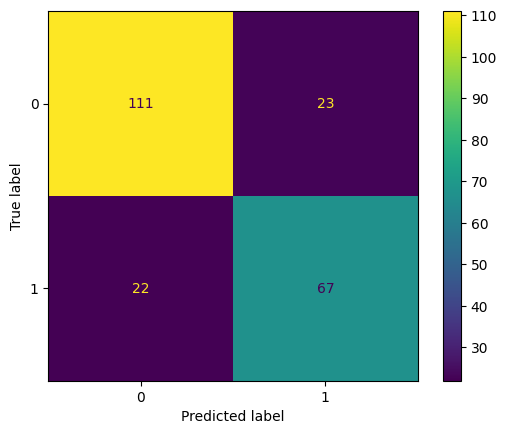

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=xgb_classifier.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_classifier.classes_)
disp.plot()
plt.show()